In [22]:
#DeeplearnEVI

In [41]:
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *

Bring all the data data in 

In [42]:
LVIS = pd.read_csv (r'D:\Gabon_Lidar\DATA\pandas_csv\LVIS2_Gabon2016_0308_R1808_studyareaa.csv')
LVIS

,OBJECTID,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,...,RH98,RH99,RH100,AZIMUTH,INCIDENTANGLE,RANGE,COMPLEXITY,CHANNEL_L1B,CHANNEL_ZG,CHANNEL_RH
0,1,1657455174,11689486,48006.889,9.422888,0.617327,17.89,-999,-999,-999,...,8.54,9.06,9.96,188.40,2.235,7705.33,-999,1,1,1
1,2,1657455174,11689489,48006.892,9.422886,0.617044,17.57,-999,-999,-999,...,3.37,3.74,4.34,187.58,2.465,7705.35,-999,1,1,1
2,3,1657455174,11689490,48006.893,9.422886,0.616949,17.68,-999,-999,-999,...,5.69,6.14,6.74,187.34,2.542,7705.95,-999,1,1,1
3,4,1657455174,11689493,48006.896,9.422884,0.616666,17.46,-999,-999,-999,...,2.99,3.36,3.96,186.70,2.772,7707.17,-999,1,1,1
4,5,1657455174,11689494,48006.897,9.422884,0.616572,17.47,-999,-999,-999,...,2.77,3.14,3.66,186.50,2.849,7707.77,-999,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,824,1657455148,9911421,46228.812,9.330292,0.546591,25.30,-999,-999,-999,...,3.26,3.86,5.43,175.01,2.612,7703.56,-999,2,2,1
824,825,1657455148,9911422,46228.813,9.330293,0.546496,24.39,-999,-999,-999,...,5.39,7.19,9.28,175.16,2.690,7704.76,-999,1,1,1
825,826,1657455148,9911424,46228.815,9.330295,0.546308,26.94,-999,-999,-999,...,4.57,5.76,8.23,175.42,2.844,7706.57,-999,1,1,1
826,827,1657455148,9911425,46228.816,9.330296,0.546213,24.59,-999,-999,-999,...,6.06,6.66,7.93,175.54,2.921,7706.58,-999,1,1,1


In [43]:
# Geopandas 

In [44]:
subplots = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Mondah_Field_Data_Plot-0_25ha.shp')

In [45]:
subplots.head(3)

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,NASA01,1.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,8.44,7.02,10.25,59,236,0.47,1.90,0.48,17.93,"POLYGON ((535822.917 61366.633, 535823.867 613..."
1,NASA01,1.2,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,14.75,11.76,18.51,58,232,0.66,2.63,0.50,23.30,"POLYGON ((535821.018 61316.669, 535821.968 613..."
2,NASA01,2.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,49.84,39.29,62.83,96,384,2.07,8.26,0.46,26.20,"POLYGON ((535872.881 61364.734, 535873.831 613..."


In [46]:
#Changing CRS 
subplots_4326= subplots.to_crs(epsg=4326)

<AxesSubplot:>

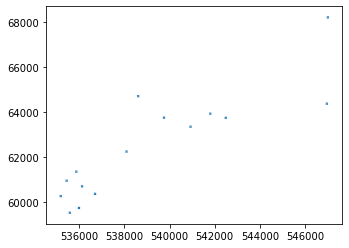

In [47]:
subplots.plot()

In [48]:
LVISpoints = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\LVIS2_Gabon2016_0308_R1808_studyarea.shp')

<AxesSubplot:>

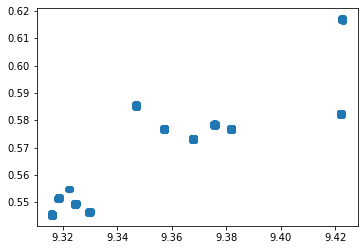

In [49]:
LVISpoints.plot()

In [50]:
Trees = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Mondah_Field_Data_Trees_in_study_site_lat_lon_a.shp')

<AxesSubplot:>

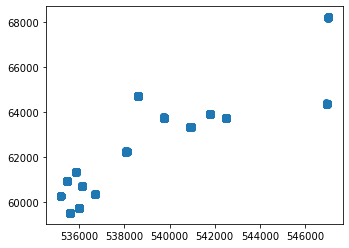

In [51]:
Trees.plot()

In [52]:
#finding point in a polygon 


In [53]:
LVIS_in_subplots = gpd.overlay(LVISpoints,subplots_4326, how = 'intersection')

In [54]:
LVIS_in_subplots.head()

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,1657455174,11689486,48006.889,9.422888,0.617327,17.89,-999,-999,-999,9.422889,...,2.97,2.4,3.64,44,176,0.2,0.78,0.47,12.48,POINT (9.42289 0.61733)
1,1657455174,11689489,48006.892,9.422886,0.617044,17.57,-999,-999,-999,9.422886,...,2.97,2.4,3.64,44,176,0.2,0.78,0.47,12.48,POINT (9.42289 0.61704)
2,1657455174,11689490,48006.893,9.422886,0.616949,17.68,-999,-999,-999,9.422886,...,2.97,2.4,3.64,44,176,0.2,0.78,0.47,12.48,POINT (9.42289 0.61695)
3,1657455174,11689535,48006.938,9.422791,0.617132,17.54,-999,-999,-999,9.422791,...,2.97,2.4,3.64,44,176,0.2,0.78,0.47,12.48,POINT (9.42279 0.61713)
4,1657455174,11689536,48006.939,9.422790,0.617226,17.69,-999,-999,-999,9.422791,...,2.97,2.4,3.64,44,176,0.2,0.78,0.47,12.48,POINT (9.42279 0.61723)


<AxesSubplot:>

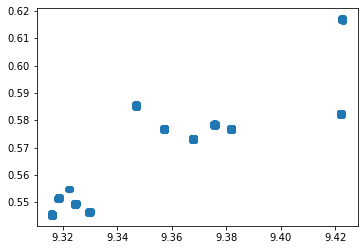

In [55]:
LVIS_in_subplots.plot()

In [56]:
subplots_4326

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,NASA01,1.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,8.44,7.02,10.25,59,236,0.47,1.90,0.48,17.93,"POLYGON ((9.32194 0.55519, 9.32195 0.55542, 9...."
1,NASA01,1.2,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,14.75,11.76,18.51,58,232,0.66,2.63,0.50,23.30,"POLYGON ((9.32193 0.55474, 9.32194 0.55497, 9...."
2,NASA01,2.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,49.84,39.29,62.83,96,384,2.07,8.26,0.46,26.20,"POLYGON ((9.32239 0.55518, 9.32240 0.55540, 9...."
3,NASA01,2.2,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,31.38,23.51,41.00,40,160,1.14,4.55,0.49,26.57,"POLYGON ((9.32239 0.55495, 9.32239 0.55518, 9...."
4,NASA02,1.1,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,135.58,98.84,186.53,122,488,3.43,13.73,0.53,59.23,"POLYGON ((9.31812 0.55157, 9.31813 0.55179, 9...."
5,NASA02,1.2,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,164.60,133.47,201.55,142,568,4.84,19.36,0.56,42.10,"POLYGON ((9.31811 0.55134, 9.31812 0.55157, 9...."
6,NASA02,2.1,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,143.22,125.73,161.85,186,744,5.05,20.21,0.56,28.44,"POLYGON ((9.31857 0.55155, 9.31858 0.55178, 9...."
7,NASA02,2.2,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,628.04,480.42,807.15,146,584,11.90,47.61,0.70,42.50,"POLYGON ((9.31856 0.55133, 9.31857 0.55155, 9...."
8,NASA03,1.1,2016-02-01,TropRF,3097.73,25.64,Evergreen Broadleaf trees,0.549282,9.324708,C,...,14.74,11.23,19.21,35,140,0.75,3.01,0.40,26.07,"POLYGON ((9.32424 0.54932, 9.32425 0.54954, 9...."
9,NASA03,1.2,2016-02-01,TropRF,3097.73,25.64,Evergreen Broadleaf trees,0.549282,9.324708,C,...,27.77,20.37,38.30,61,244,0.97,3.89,0.51,35.67,"POLYGON ((9.32423 0.54909, 9.32424 0.54932, 9...."


In [57]:
#Filter for one subplot 

In [58]:
subplots

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,NASA01,1.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,8.44,7.02,10.25,59,236,0.47,1.90,0.48,17.93,"POLYGON ((535822.917 61366.633, 535823.867 613..."
1,NASA01,1.2,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,14.75,11.76,18.51,58,232,0.66,2.63,0.50,23.30,"POLYGON ((535821.018 61316.669, 535821.968 613..."
2,NASA01,2.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,49.84,39.29,62.83,96,384,2.07,8.26,0.46,26.20,"POLYGON ((535872.881 61364.734, 535873.831 613..."
3,NASA01,2.2,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,31.38,23.51,41.00,40,160,1.14,4.55,0.49,26.57,"POLYGON ((535871.932 61339.752, 535872.881 613..."
4,NASA02,1.1,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,135.58,98.84,186.53,122,488,3.43,13.73,0.53,59.23,"POLYGON ((535397.386 60965.832, 535398.337 609..."
5,NASA02,1.2,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,164.60,133.47,201.55,142,568,4.84,19.36,0.56,42.10,"POLYGON ((535396.436 60940.851, 535397.386 609..."
6,NASA02,2.1,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,143.22,125.73,161.85,186,744,5.05,20.21,0.56,28.44,"POLYGON ((535447.350 60963.931, 535448.301 609..."
7,NASA02,2.2,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,628.04,480.42,807.15,146,584,11.90,47.61,0.70,42.50,"POLYGON ((535446.399 60938.949, 535447.350 609..."
8,NASA03,1.1,2016-02-01,TropRF,3097.73,25.64,Evergreen Broadleaf trees,0.549282,9.324708,C,...,14.74,11.23,19.21,35,140,0.75,3.01,0.40,26.07,"POLYGON ((536078.570 60717.052, 536079.520 607..."
9,NASA03,1.2,2016-02-01,TropRF,3097.73,25.64,Evergreen Broadleaf trees,0.549282,9.324708,C,...,27.77,20.37,38.30,61,244,0.97,3.89,0.51,35.67,"POLYGON ((536077.620 60692.070, 536078.570 607..."


In [59]:
#Filter for plot

In [60]:
subplots13 = subplots_4326[(subplots_4326['plot'] == 'NASA13')]

In [61]:
subplots13

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
28,NASA13,1.1,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,237.47,206.62,272.37,146,584,6.65,26.59,0.59,32.22,"POLYGON ((9.35684 0.57683, 9.35685 0.57705, 9...."
29,NASA13,1.2,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,284.33,243.19,334.24,206,824,7.28,29.13,0.65,32.37,"POLYGON ((9.35683 0.57660, 9.35684 0.57683, 9...."
30,NASA13,2.1,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,238.84,181.73,321.15,294,1176,6.66,26.65,0.59,38.39,"POLYGON ((9.35729 0.57681, 9.35729 0.57704, 9...."
31,NASA13,2.2,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."


In [62]:
subplots13

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
28,NASA13,1.1,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,237.47,206.62,272.37,146,584,6.65,26.59,0.59,32.22,"POLYGON ((9.35684 0.57683, 9.35685 0.57705, 9...."
29,NASA13,1.2,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,284.33,243.19,334.24,206,824,7.28,29.13,0.65,32.37,"POLYGON ((9.35683 0.57660, 9.35684 0.57683, 9...."
30,NASA13,2.1,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,238.84,181.73,321.15,294,1176,6.66,26.65,0.59,38.39,"POLYGON ((9.35729 0.57681, 9.35729 0.57704, 9...."
31,NASA13,2.2,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."


In [63]:
# Filter for subplot 

In [76]:
subplots13_22 = subplots13[(subplots13.subplot == 2.2)]

In [77]:
subplots13_22.head()

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
31,NASA13,2.2,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."


In [78]:
#Finding LVIS in subplot 1.1

In [79]:
LVIS_in_subplots13_22 = gpd.overlay(LVISpoints,subplots13_22, how = 'intersection')

In [80]:
LVIS_in_subplots13_22

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,1657455141,9420783,45738.170,9.357683,0.576376,26.65,-999,-999,-999,9.357685,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35768 0.57638)
1,1657455141,9420784,45738.171,9.357687,0.576470,26.85,-999,-999,-999,9.357689,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35769 0.57647)
2,1657455141,9420785,45738.172,9.357690,0.576564,26.90,-999,-999,-999,9.357693,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35769 0.57656)
3,1657455141,9420786,45738.173,9.357693,0.576658,26.61,-999,-999,-999,9.357696,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35769 0.57666)
4,1657455141,9420787,45738.174,9.357697,0.576752,27.30,-999,-999,-999,9.357698,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35770 0.57675)
5,1657455141,9420972,45738.359,9.357534,0.576661,26.46,-999,-999,-999,9.357535,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35753 0.57666)
6,1657455141,9420973,45738.360,9.357529,0.576567,26.59,-999,-999,-999,9.357531,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35753 0.57657)
7,1657455141,9420974,45738.361,9.357525,0.576473,26.41,-999,-999,-999,9.357526,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35753 0.57647)
8,1657455141,9420975,45738.362,9.357521,0.576378,26.35,-999,-999,-999,9.357522,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35752 0.57638)
9,1657455141,9421009,45738.396,9.357436,0.576473,26.25,-999,-999,-999,9.357438,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35744 0.57647)


In [81]:
#LVISshotpoints = LVISpoints[(LVISpoints.LFID == 1657455174)]


In [82]:
#LVISshotpoints.head(3)

In [83]:
# Ploting 

Subsetting it into a smaller data set 

In [84]:
#Select by Shot numer 
#LVISshot = LVIS[(LVIS.LFID == 1657455174)]

LVIS_in_subplots13_22.head()

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,1657455141,9420783,45738.170,9.357683,0.576376,26.65,-999,-999,-999,9.357685,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35768 0.57638)
1,1657455141,9420784,45738.171,9.357687,0.576470,26.85,-999,-999,-999,9.357689,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35769 0.57647)
2,1657455141,9420785,45738.172,9.357690,0.576564,26.90,-999,-999,-999,9.357693,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35769 0.57656)
3,1657455141,9420786,45738.173,9.357693,0.576658,26.61,-999,-999,-999,9.357696,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35769 0.57666)
4,1657455141,9420787,45738.174,9.357697,0.576752,27.30,-999,-999,-999,9.357698,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35770 0.57675)


In [85]:
# This is creating the array 

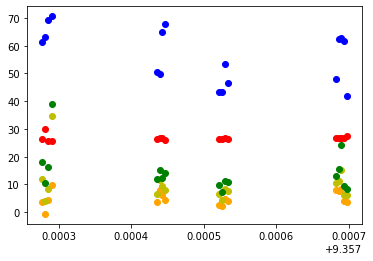

In [86]:
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZG,color='r') 
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH25,color='orange') 
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH50,color='y')
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH75,color='g')
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZT,color='b')
matplotlib.pyplot.show()

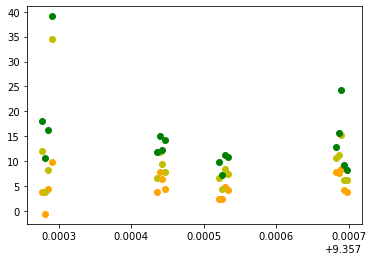

In [87]:
#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZG,color='r') 
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH25,color='orange') 
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH50,color='y')
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH75,color='g')
#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZT,color='b')
matplotlib.pyplot.show()

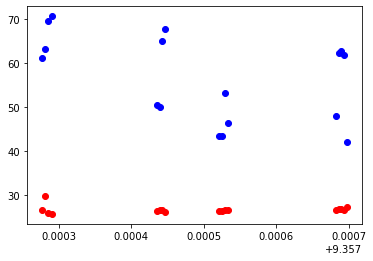

In [88]:
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZG,color='r') 
#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH25,color='orange') 
#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH50,color='y')
#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH75,color='g')
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZT,color='b')
matplotlib.pyplot.show()

In [89]:
I don't know after this point 

SyntaxError: invalid syntax (<ipython-input-89-b1b6413b441c>, line 1)

In [ ]:
#All of of the shots are in bands 
LVIS2_Gabon2016_0308_R1808_046644_XYTableToPoint
LVIS2_Gabon2016_0308_R1808_045612_XYTableToPoint

In [ ]:
L1_04644 = h5py.File(r'D:\Gabon_Lidar\DATA\level1\5000000734313-2\138349093\LVIS1B_Gabon2016_0308_R1808_046644.h5','r')

In [ ]:
L1_045612 = h5py.File(r'D:\Gabon_Lidar\DATA\level1\5000000734313-1\138349060\LVIS1B_Gabon2016_0308_R1808_045612.h5','r')

In [ ]:
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
lvis = L1_04644

In [25]:
myshotnum = int(9420783)

In [26]:
# Detecting waveform size
for member in lvis:
    if member.startswith('Z'):
        wfsize = member.strip('Z')
Zmax = ''.join(['Z',wfsize])
wfrange = int(wfsize) + 1
    
try:
    wave_idx = np.where(all_shotnums==myshotnum)[0][0]
    plotWaveform()
except IndexError:
        print('Shot number entered does not exist in this dataset.')

NameError: name 'lvis' is not defined

In [27]:
#extract the single waveform and elevation attributes Z0 and Z1023;
waveform = lvis['RXWAVE'][wave_idx]
Z0 = lvis['Z0'][wave_idx]
Z1023 = lvis[Zmax][wave_idx]

NameError: name 'lvis' is not defined

In [28]:
myshotnum = int(9420783)

In [16]:

#get wave index from shotnumber and test if exists
all_shotnums = np.array(lvis['SHOTNUMBER'])
wave_idx = ''
Zmax = ''
wfrange = ''
wfsize = ''

In [17]:

    # Detecting waveform size
    for member in lvis:
        if member.startswith('Z'):
            wfsize = member.strip('Z')
    Zmax = ''.join(['Z',wfsize])
    wfrange = int(wfsize) + 1
    
    try:
        wave_idx = np.where(all_shotnums==myshotnum)[0][0]
        plotWaveform()
    except IndexError:
        print('Shot number entered does not exist in this dataset.')

Shot number entered does not exist in this dataset.


In [22]:
#extract the single waveform and elevation attributes Z0 and Z1023;
waveform = lvis['RXWAVE'][wave_idx]
Z0 = lvis['Z0'][wave_idx]
Z1023 = lvis[Zmax][wave_idx]

ValueError: Field names only allowed for compound types

In [19]:

    #extract the single waveform and elevation attributes Z0 and Z1023;
    waveform = lvis['RXWAVE'][wave_idx]
    Z0 = lvis['Z0'][wave_idx]
    Z1023 = lvis[Zmax][wave_idx]

    #find the elevation difference from Z0 to Z1023 and divide into 1023 equal intervals
    zstretch = np.add(Z1023,np.multiply(range(wfrange,0,-1),((Z0-Z1023)/int(wfsize))))

    #search the L2 text file and extract the RH25, RH50.....RH100 values for the waveform you are querying
    with open(mytxtpath) as f:
        for line in f:
            try:
                myshot = line.split()[1]
                if int(myshot)==int(myshotnum):
                    ZG = float(line.split()[5])
                    ZT = float(line.split()[8])
                    RH25 = float(line.split()[12])+ZG
                    RH50 = float(line.split()[17])+ZG
                    RH75 = float(line.split()[22])+ZG
                    RH10 = float(line.split()[9])+ZG 
                    break
            except ValueError:
                pass
                
    #set the z range limits for plotting the waveform to crop the noise  
    zmin=RH10-(ZT-RH10)/6   #sets zmin at 15% below the waveform range defined in RH10-ZT
    zmax=ZT+(ZT-RH10)/18   #sets zmax at 5% above the waveform range defined in RH10-ZT

    #crop the waveform and elevation arrays to the z range limits
    x=zstretch>=zmin #this returns boolean True/False based on the comparison condition statement
    y=zstretch<=zmax 
    z=(x==y) #this creates a combined boolean result from the previous two condition statements
    waveform_crop = []
    zstretch_crop = []
    for i in range(0,len(waveform)):
        if z[i]==True:
            waveform_crop.append(waveform[i])
            zstretch_crop.append(zstretch[i])  
        
    #plot the waveform as matplotlib figure
    fig = plt.figure(figsize=(15, 6))
    figplot = fig.add_subplot(121) 
    figplot.plot(waveform,zstretch)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')

    figplot = fig.add_subplot(122) 
    figplot.plot(waveform_crop,zstretch_crop)
    figplot.hlines(ZT,min(waveform),max(waveform),lw=1,linestyle='-', color='b',label='ZT')
    figplot.hlines(RH75,min(waveform),max(waveform),lw=1,linestyle='-', color='g',label='RH75')
    figplot.hlines(RH50,min(waveform),max(waveform),lw=1,linestyle='-', color='y',label='RH50')
    figplot.hlines(RH25,min(waveform),max(waveform),lw=1,linestyle='-', color='orange',label='RH25')
    figplot.hlines(ZG,min(waveform),max(waveform),lw=1,linestyle='-', color='r',label='ZG')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')
    plt.show(block=False)

ValueError: Field names only allowed for compound types

In [18]:
def plotWaveform():
    global wave_idx
    global Zmax
    global wfrange
    global wfsize
    #extract the single waveform and elevation attributes Z0 and Z1023;
    waveform = lvis['RXWAVE'][wave_idx]
    Z0 = lvis['Z0'][wave_idx]
    Z1023 = lvis[Zmax][wave_idx]

    #find the elevation difference from Z0 to Z1023 and divide into 1023 equal intervals
    zstretch = np.add(Z1023,np.multiply(range(wfrange,0,-1),((Z0-Z1023)/int(wfsize))))

    #search the L2 text file and extract the RH25, RH50.....RH100 values for the waveform you are querying
    with open(mytxtpath) as f:
        for line in f:
            try:
                myshot = line.split()[1]
                if int(myshot)==int(myshotnum):
                    ZG = float(line.split()[5])
                    ZT = float(line.split()[8])
                    RH25 = float(line.split()[12])+ZG
                    RH50 = float(line.split()[17])+ZG
                    RH75 = float(line.split()[22])+ZG
                    RH10 = float(line.split()[9])+ZG 
                    break
            except ValueError:
                pass
                
    #set the z range limits for plotting the waveform to crop the noise  
    zmin=RH10-(ZT-RH10)/6   #sets zmin at 15% below the waveform range defined in RH10-ZT
    zmax=ZT+(ZT-RH10)/18   #sets zmax at 5% above the waveform range defined in RH10-ZT

    #crop the waveform and elevation arrays to the z range limits
    x=zstretch>=zmin #this returns boolean True/False based on the comparison condition statement
    y=zstretch<=zmax 
    z=(x==y) #this creates a combined boolean result from the previous two condition statements
    waveform_crop = []
    zstretch_crop = []
    for i in range(0,len(waveform)):
        if z[i]==True:
            waveform_crop.append(waveform[i])
            zstretch_crop.append(zstretch[i])  
        
    #plot the waveform as matplotlib figure
    fig = plt.figure(figsize=(15, 6))
    figplot = fig.add_subplot(121) 
    figplot.plot(waveform,zstretch)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')

    figplot = fig.add_subplot(122) 
    figplot.plot(waveform_crop,zstretch_crop)
    figplot.hlines(ZT,min(waveform),max(waveform),lw=1,linestyle='-', color='b',label='ZT')
    figplot.hlines(RH75,min(waveform),max(waveform),lw=1,linestyle='-', color='g',label='RH75')
    figplot.hlines(RH50,min(waveform),max(waveform),lw=1,linestyle='-', color='y',label='RH50')
    figplot.hlines(RH25,min(waveform),max(waveform),lw=1,linestyle='-', color='orange',label='RH25')
    figplot.hlines(ZG,min(waveform),max(waveform),lw=1,linestyle='-', color='r',label='ZG')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')
    plt.show(block=False)

In [12]:
#PLOT A WAVEFORM WITH RH VALUES

#print "Usage: python py_waveplot.py <path_to_L1B_HDF5_file> <path_to_L2_txt_file> "

# Updated on 9 March 2018
# Added ability to autodetect waveform size


lvis = h5py.File(mypath,'r')
#get wave index from shotnumber and test if exists
all_shotnums = np.array(lvis['SHOTNUMBER'])
wave_idx = ''
Zmax = ''
wfrange = ''
wfsize = ''

def checkIdxVal():
    global wave_idx
    global Zmax
    global wfrange
    global wfsize
    # Detecting waveform size
    for member in lvis:
        if member.startswith('Z'):
            wfsize = member.strip('Z')
    Zmax = ''.join(['Z',wfsize])
    wfrange = int(wfsize) + 1
    
    try:
        wave_idx = np.where(all_shotnums==myshotnum)[0][0]
        plotWaveform()
    except IndexError:
        print('Shot number entered does not exist in this dataset.')

def plotWaveform():
    global wave_idx
    global Zmax
    global wfrange
    global wfsize
    #extract the single waveform and elevation attributes Z0 and Z1023;
    waveform = lvis['RXWAVE'][wave_idx]
    Z0 = lvis['Z0'][wave_idx]
    Z1023 = lvis[Zmax][wave_idx]

    #find the elevation difference from Z0 to Z1023 and divide into 1023 equal intervals
    zstretch = np.add(Z1023,np.multiply(range(wfrange,0,-1),((Z0-Z1023)/int(wfsize))))

    #search the L2 text file and extract the RH25, RH50.....RH100 values for the waveform you are querying
    with open(mytxtpath) as f:
        for line in f:
            try:
                myshot = line.split()[1]
                if int(myshot)==int(myshotnum):
                    ZG = float(line.split()[5])
                    ZT = float(line.split()[8])
                    RH25 = float(line.split()[12])+ZG
                    RH50 = float(line.split()[17])+ZG
                    RH75 = float(line.split()[22])+ZG
                    RH10 = float(line.split()[9])+ZG 
                    break
            except ValueError:
                pass
                
    #set the z range limits for plotting the waveform to crop the noise  
    zmin=RH10-(ZT-RH10)/6   #sets zmin at 15% below the waveform range defined in RH10-ZT
    zmax=ZT+(ZT-RH10)/18   #sets zmax at 5% above the waveform range defined in RH10-ZT

    #crop the waveform and elevation arrays to the z range limits
    x=zstretch>=zmin #this returns boolean True/False based on the comparison condition statement
    y=zstretch<=zmax 
    z=(x==y) #this creates a combined boolean result from the previous two condition statements
    waveform_crop = []
    zstretch_crop = []
    for i in range(0,len(waveform)):
        if z[i]==True:
            waveform_crop.append(waveform[i])
            zstretch_crop.append(zstretch[i])  
        
    #plot the waveform as matplotlib figure
    fig = plt.figure(figsize=(15, 6))
    figplot = fig.add_subplot(121) 
    figplot.plot(waveform,zstretch)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')

    figplot = fig.add_subplot(122) 
    figplot.plot(waveform_crop,zstretch_crop)
    figplot.hlines(ZT,min(waveform),max(waveform),lw=1,linestyle='-', color='b',label='ZT')
    figplot.hlines(RH75,min(waveform),max(waveform),lw=1,linestyle='-', color='g',label='RH75')
    figplot.hlines(RH50,min(waveform),max(waveform),lw=1,linestyle='-', color='y',label='RH50')
    figplot.hlines(RH25,min(waveform),max(waveform),lw=1,linestyle='-', color='orange',label='RH25')
    figplot.hlines(ZG,min(waveform),max(waveform),lw=1,linestyle='-', color='r',label='ZG')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')
    plt.show(block=False)


OSError: Unable to open file (unable to open file: name = '-f', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
#PLOT A WAVEFORM WITH RH VALUES

#print "Usage: python py_waveplot.py <path_to_L1B_HDF5_file> <path_to_L2_txt_file> "

# Updated on 9 March 2018
# Added ability to autodetect waveform size

import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt

mypath = sys.argv[1]
mytxtpath = sys.argv[2]

lvis = h5py.File(mypath,'r')
#get wave index from shotnumber and test if exists
all_shotnums = np.array(lvis['SHOTNUMBER'])
wave_idx = ''
Zmax = ''
wfrange = ''
wfsize = ''

def checkIdxVal():
    global wave_idx
    global Zmax
    global wfrange
    global wfsize
    # Detecting waveform size
    for member in lvis:
        if member.startswith('Z'):
            wfsize = member.strip('Z')
    Zmax = ''.join(['Z',wfsize])
    wfrange = int(wfsize) + 1
    
    try:
        wave_idx = np.where(all_shotnums==myshotnum)[0][0]
        plotWaveform()
    except IndexError:
        print('Shot number entered does not exist in this dataset.')

def plotWaveform():
    global wave_idx
    global Zmax
    global wfrange
    global wfsize
    #extract the single waveform and elevation attributes Z0 and Z1023;
    waveform = lvis['RXWAVE'][wave_idx]
    Z0 = lvis['Z0'][wave_idx]
    Z1023 = lvis[Zmax][wave_idx]

    #find the elevation difference from Z0 to Z1023 and divide into 1023 equal intervals
    zstretch = np.add(Z1023,np.multiply(range(wfrange,0,-1),((Z0-Z1023)/int(wfsize))))

    #search the L2 text file and extract the RH25, RH50.....RH100 values for the waveform you are querying
    with open(mytxtpath) as f:
        for line in f:
            try:
                myshot = line.split()[1]
                if int(myshot)==int(myshotnum):
                    ZG = float(line.split()[5])
                    ZT = float(line.split()[8])
                    RH25 = float(line.split()[12])+ZG
                    RH50 = float(line.split()[17])+ZG
                    RH75 = float(line.split()[22])+ZG
                    RH10 = float(line.split()[9])+ZG 
                    break
            except ValueError:
                pass
                
    #set the z range limits for plotting the waveform to crop the noise  
    zmin=RH10-(ZT-RH10)/6   #sets zmin at 15% below the waveform range defined in RH10-ZT
    zmax=ZT+(ZT-RH10)/18   #sets zmax at 5% above the waveform range defined in RH10-ZT

    #crop the waveform and elevation arrays to the z range limits
    x=zstretch>=zmin #this returns boolean True/False based on the comparison condition statement
    y=zstretch<=zmax 
    z=(x==y) #this creates a combined boolean result from the previous two condition statements
    waveform_crop = []
    zstretch_crop = []
    for i in range(0,len(waveform)):
        if z[i]==True:
            waveform_crop.append(waveform[i])
            zstretch_crop.append(zstretch[i])  
        
    #plot the waveform as matplotlib figure
    fig = plt.figure(figsize=(15, 6))
    figplot = fig.add_subplot(121) 
    figplot.plot(waveform,zstretch)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')

    figplot = fig.add_subplot(122) 
    figplot.plot(waveform_crop,zstretch_crop)
    figplot.hlines(ZT,min(waveform),max(waveform),lw=1,linestyle='-', color='b',label='ZT')
    figplot.hlines(RH75,min(waveform),max(waveform),lw=1,linestyle='-', color='g',label='RH75')
    figplot.hlines(RH50,min(waveform),max(waveform),lw=1,linestyle='-', color='y',label='RH50')
    figplot.hlines(RH25,min(waveform),max(waveform),lw=1,linestyle='-', color='orange',label='RH25')
    figplot.hlines(ZG,min(waveform),max(waveform),lw=1,linestyle='-', color='r',label='ZG')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')
    plt.show(block=False)

while 1:
    available = ''.join(['\nShot numbers available in this dataset: ',str(all_shotnums.min()),' - ',str(all_shotnums.max())])
    print(available)
    
    try:
        myshotnum = int(input("Please enter shot number: "))
        checkIdxVal()
    except:
        print('Must be an integer.')
    